# Jakub Bandurski, Michał Bryzik, Kacper Gruca
## Text Mining and Social Media Mining Project
## Can sentiment analysis predict the subreddit r/AITA top comment verdict?
## What are the most common topics on this subreddit?

# Imports

In [2]:
import pandas as pd

# Data

In [3]:
data = pd.read_pickle("./data/cleaned_data.pkl")
data.head(1)

,title_body_no_stopwords,C1_no_stopwords,title_body_stemmed,C1_stemmed,AITA
0,left marriage selfish right happy think thats ...,three months since bf split wife divorce two a...,left marriage selfish right happy think thats ...,three months since bf split wife divorce two a...,True


# TF-IDF matrix

Term Frequency - Inverse Document Frequency (TF-IDF) matrix is the basis for topic modelling algortihms.
TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
It is a product of two statistics, term frequency and inverse document frequency.
We are using a stanrad TF-IDF vectorizer from sklearn to calcualte the corpus TF-IDF matrix.

In [4]:
# use LDA based on TF-IDF to extract topics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [5]:
# use tfidfvectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english',
                                    use_idf=True, ngram_range=(1,3))
# fit and transform the data
tfidf = tfidf_vectorizer.fit_transform(data['title_body_stemmed'])

# Latent Dirichlet Allocation

Latent Dirichlet Allocation Model is used to extract topics from the dataset of reddit posts on AITA subreddit.

The LDA works by assuming that the documents are produced from a mixture of topics.

Those topics then generate words based on their probability distribution.

Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.

The main output of the model is two probability distributions:

1. The probability distribution of words for each topic.

2. The probability distribution of topics for each document.

The backbone is the Dirichlet distribution used to describe the distribution of topics in documents and the distribution of words in each topic.

We chose the number of topics to be 10 which was an arbitrary decision but the results were satisfactory.

In [7]:
# use LDA to extract topics
lda = LatentDirichletAllocation(n_components=10, random_state=0)
lda.fit(tfidf)
# extract the topics
topics = lda.transform(tfidf)

## Extracted topics
Detailed description in Conclusions section

In [8]:
# print the topics
for i,topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])



Topic 0:
['got', 'time', 'told', 'friends', 'know', 'people', 'like', 'said', 'friend', 'dog']
Topic 1:
['wibta', 'work', 'really', 'told', 'friends', 'dog', 'said', 'friend', 'people', 'like']
Topic 2:
['want', 'work', 'know', 'really', 'wife', 'told', 'friends', 'said', 'like', 'friend']
Topic 3:
['mom', 'friends', 'really', 'want', 'im', 'friend', 'time', 'told', 'said', 'like']
Topic 4:
['work', 'xb', 'people', 'told', 'wibta', 'friends', 'said', 'like', 'friend', 'tip']
Topic 5:
['got', 'know', 'want', 'im', 'time', 'told', 'friends', 'friend', 'like', 'said']
Topic 6:
['dog', 'asked', 'time', 'people', 'work', 'told', 'like', 'said', 'friends', 'friend']
Topic 7:
['got', 'told', 'know', 'friend', 'friends', 'people', 'wibta', 'said', 'dog', 'like']
Topic 8:
['got', 'work', 'really', 'time', 'know', 'friend', 'told', 'people', 'like', 'said']
Topic 9:
['door', 'got', 'know', 'friends', 'dog', 'told', 'people', 'friend', 'said', 'like']


# Wordclouds

For better visualization we have plotted word clouds of 40 top words in each of the topics.

Black background is used for eye safety.

In [17]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [27]:
def topic_by_index(model, feature_names, no_top_words, topic_index):
    for topic_idx, topic in enumerate(model.components_):
        if(topic_idx == topic_index):
            text = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
            wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="black",
                      width=500,
                      height=300).generate(text)
            plt.figure()
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.show()

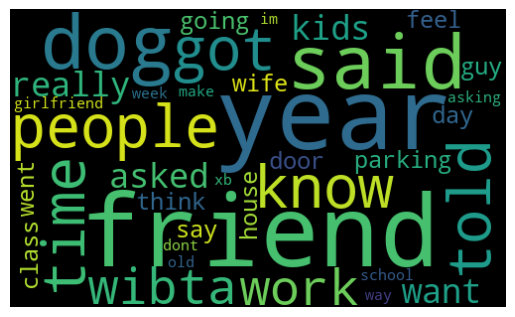

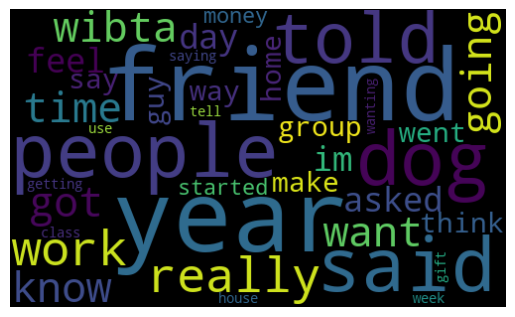

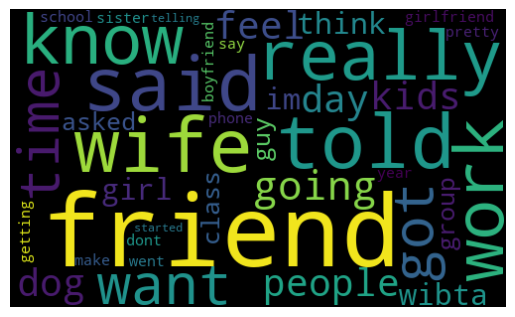

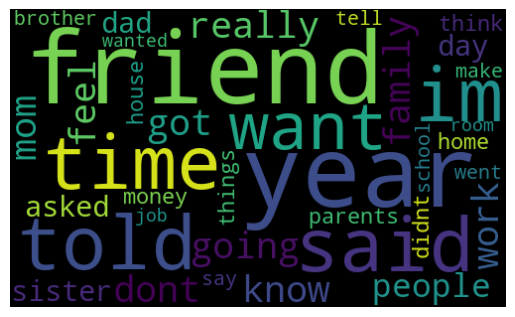

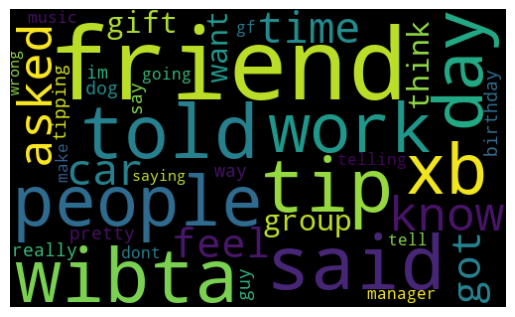

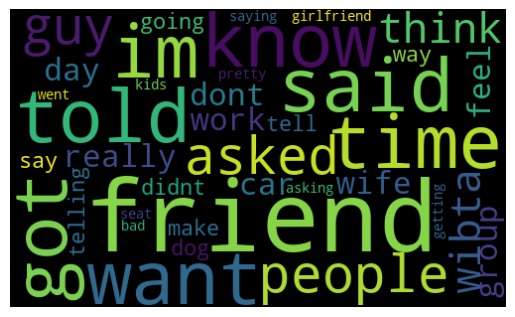

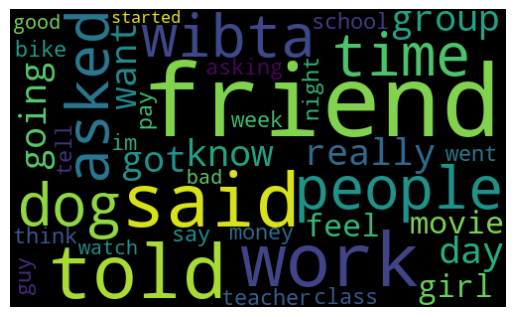

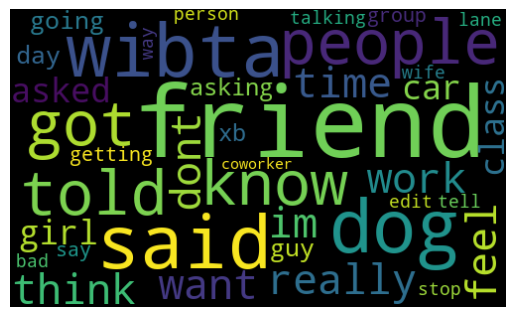

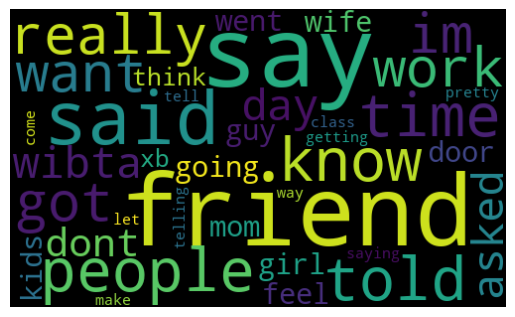

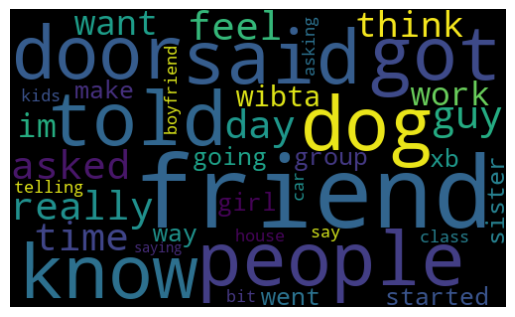

In [31]:
feature_names = tfidf_vectorizer.get_feature_names_out()

for i in range(10):
    topic_by_index(model=lda, feature_names=feature_names, no_top_words=40, topic_index=i)

# Establishing 3 topics
As seen above multiple keywords are repeated and topics are very similar.

Therefore we are decreasing the number of topics from 10 to 3 to capture  the essence of the subredit

## LDA

In [32]:
# use LDA to extract topics
lda = LatentDirichletAllocation(n_components=3, random_state=0)
lda.fit(tfidf)
# extract the topics
topics = lda.transform(tfidf)

In [33]:
# print the topics
for i,topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])



Topic 0:
['kinda clingy creepy', 'talking exchanged selfies', 'cute flirted little', 'clingy creepy', 'flirted little', 'exchanged selfies small', 'girl snap started', 'happened months added', 'taking students', 'students phone']
Topic 1:
['food', 'lane', 'cats', 'roommate', 'clean', 'seat', 'pay', 'dishes', 'rent', 'cat']
Topic 2:
['know', 'really', 'friends', 'want', 'im', 'time', 'friend', 'told', 'said', 'like']


## Wordclouds

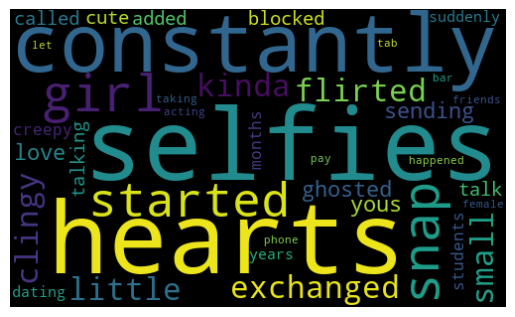

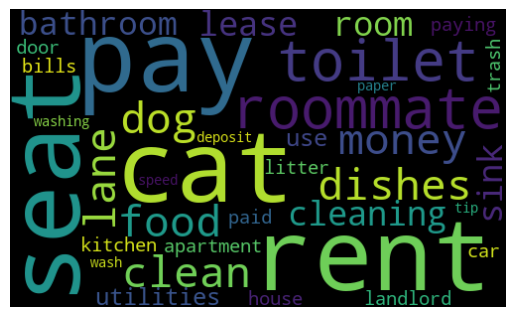

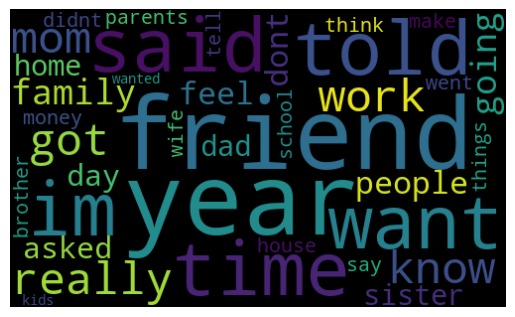

In [34]:
feature_names = tfidf_vectorizer.get_feature_names_out()

for i in range(10):
    topic_by_index(model=lda, feature_names=feature_names, no_top_words=40, topic_index=i)

# Conclusions

As mentioned before the abritray choice of 10 topics turned out to be a good start that we decreaesd to 3.
T
he 10 topics were too similar to each other and did not provide much insight.

Now we can see what are the top 3 topics on /r/AITA.

Topic 0: School students' problems

Based on the keywords, we can see that this topic is about young people's issue concerning:

- selfies
- teachers
- colleagues

Topic 1: Roomates and pets

Based on the keywords, we can see that this topic is about issues tha evolve from social situations such as:

- living together
- having pets
- sharing expenses

Topic 2: General disagreements with family members and friends

Based on the keywords: said, friends, told like we can see that this topic is probably about disagreements.

This analysis provides insights into the most common topics on /r/AITA.

We have seen that people with enough anonymity can ask complete strangers from anywhere about very private issues.

Such as problems in school, disagreements with roomates or even squarrels with family members.

That is a very interesting socio-psychological phenomenon that we can observe on the internet and can be further research using other NLP and Text Mining techniques.